<h1> Learning, Technology & Humanities </h1>
<h3> IS310 - Sean Yoon </h3>

<a target="_blank" href="https://colab.research.google.com/github/sunghwansyoon/is310-coding-assignments/blob/main/IS%20310%20-%20Project.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

<h2> Introduction </h2>

Inspired by assigned reading material on January 18, “Kids Who Grew up with Search Engines Could Change STEM Education Forever.” by Monica Chin. I brought the idea of changing curriculums and instructors’ efforts to adapt to the changing students and environment. <br>

Chin shared concerns from college professors about the difference between their ‘directory’ learning versus students’ ‘search’ learning, and such differences might lead them to change the teaching curriculum. Because new technologies and events occur occasionally, the curriculum must also be flexible to changes. Recently, we experienced a shift in teaching curriculum style due to COVID-19, online instructions. One of the courses that switched the teaching curriculum due to the pandemic was introduction to computer science courses, which became online and asynchronized. 

In the research paper ‘COVID-19 and Grade Inflation: Analysis of Undergraduates GPAs During the Pandemic’ (https://doi.org/10.1177/21582440231209110), Tillinghast et al. mentioned that the GPA inflation caused by COVID-19 lockdown is the change of the learning environment and low expectations to students from unusual situations. The authors also address how students could have taken advantage of changing letter grades to pass/fail, and some instructors weren’t familiar with the online learning environment so they couldn’t provide quality instruction. Therefore, the student’s GPAs could remain or increase with less learning. Another implication was students violating academic dishonesty since instructors' supervision deteriorated.

The Daily Illini (https://dailyillini.com/news-stories/2021/02/04/covid-19-grade-options-result-in-boosted-gpas-across-university/) addressed that extended deadlines and the ability to select CR/NC measures caused grade inflation during the pandemic. 43.38% of the students who received at least one C and 49.35% with at least one F from their course chose the CR/NC measure.

Since 2003, the idea of grade inflation has risen by Stuart Rojstaczer. He claims that students’ motivation for better grades and effort in learning could decline. Also, GPA may lose its evaluation of students' performances. As mentioned, grade inflation can be caused by changing environments. Thus, using the UIUC GPA dataset, specifically computer science classes, from 2010 to 2023, I will discover the relationship between UIUC students’ GPAs and changes in the teaching curriculum. Furthermore, I will discuss potential patterns observed from the changes in GPA over time.

In [2]:
#importing libraries
from bs4 import BeautifulSoup
import requests
import csv
import pandas as pd
import matplotlib.pyplot as plt

<h2> Data Collection & Curation </h2>
<h3> Overall Trend of GPA </h3>

Using BeautifulSoup, I web scrapped the 'gradeinflation.com' website which contains students' GPAs from 1926 to 2015 in the table. From the HTML link, I looked for '\<table\>' using soup.find() function. Then, using 'tr' to capture all the rows of the table using for loops and stored items in ‘td’ using nested for loop. I stored captured items in the list and turned them into a pandas data frame. Later in the Data Analysis & Methods section, the data frame is used to visualize the change in GPA over the years.

In the other data collection, I used a .csv file provided by Professor Wade Fagen-Ulmschneider. I reduced and reshaped the data frame to remain in Intro to Computer Science I & II classes. I removed redundant or unnecessary columns. The CSV file provides students’ letter grades and total students. However, I had to compute GPA using the provided columns. The final form of the dataset is the ‘cs_intro’ data frame.

Before conducting the data collection, I believed data collection with the CSV files would require less work than web scraping the website. However, in reality, the data from the website included only the necessary data so I didn’t have to conduct significantly less curation. This process shows the advantages and disadvantages of web scrapping and importing data. While web scraping may require discovering HTML functions from the website and complex codes compared to importing the CSV file, I could exclude unnecessary data during the web scraping process. Importing CSV files only requires a single line of code but curating the data requires more time and thought.

In [3]:
html = requests.get('https://www.gradeinflation.com/Illinois.html').text
soup = BeautifulSoup(html, 'html.parser')
table = soup.find('table')
data = []
for row in table.find_all('tr'):
    cols = row.find_all('td')
    if len(cols) == 0:
        cols = row.find_all('th')
    cols = [ele.text.strip() for ele in cols]
    data.append([ele for ele in cols if ele])
df_web = pd.DataFrame(data, columns=['Year', 'GPA'])
df_web['GPA'] = pd.to_numeric(df_web['GPA'], errors='coerce')
print(df_web)

          Year   GPA
0   Circa 1926  2.09
1         1967  2.77
2         1999  3.12
3         2002  3.17
4         2005  3.19
5         2009  3.21
6         2010  3.24
7         2011  3.22
8         2012  3.22
9         2013  3.24
10        2014  3.26
11        2015  3.25


In [4]:
df_web['GPA'].dtypes

dtype('float64')

As we can observe from 

In [5]:
# Imported dataset from a website managed by Professor Wade Fagen-Ulmschneider
url = "https://waf.cs.illinois.edu/discovery/gpa.csv"
df = pd.read_csv(url)
df

,Year,Term,YearTerm,Subject,Number,Course Title,Sched Type,A+,A,A-,...,C+,C,C-,D+,D,D-,F,W,Students,Primary Instructor
0,2023,Spring,2023-sp,AAS,100,Intro Asian American Studies,DIS,0,11,5,...,0,0,0,0,0,0,1,0,22,"Shin, Jeongsu"
1,2023,Spring,2023-sp,AAS,100,Intro Asian American Studies,DIS,0,17,2,...,0,0,0,0,0,0,0,1,23,"Shin, Jeongsu"
2,2023,Spring,2023-sp,AAS,100,Intro Asian American Studies,DIS,0,13,2,...,0,0,1,0,0,0,1,0,21,"Lee, Sabrina Y"
3,2023,Spring,2023-sp,AAS,200,U.S. Race and Empire,LCD,6,15,5,...,0,0,0,0,1,0,1,0,33,"Sawada, Emilia"
4,2023,Spring,2023-sp,AAS,215,US Citizenship Comparatively,LCD,16,12,2,...,0,0,0,0,0,0,0,0,33,"Kwon, Soo Ah"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69064,2010,Summer,2010-su,STAT,410,Statistics and Probability II,LEC,5,10,2,...,0,1,3,0,0,0,2,1,31,"Stepanov, Alexei G"
69065,2010,Summer,2010-su,STAT,440,Statistical Data Management,LEC,4,12,8,...,0,0,0,0,0,0,0,0,28,"Unger, David"
69066,2010,Summer,2010-su,TAM,212,Introductory Dynamics,LEC,0,1,3,...,5,1,1,0,2,0,1,0,28,"Morgan, William T"
69067,2010,Summer,2010-su,TAM,251,Introductory Solid Mechanics,LCD,1,2,2,...,3,3,2,0,0,1,1,0,21,"Ott-Monsivais, Stephanie"


In [6]:
df_cs = df[df['Subject'] == 'CS']
df_cs

,Year,Term,YearTerm,Subject,Number,Course Title,Sched Type,A+,A,A-,...,C+,C,C-,D+,D,D-,F,W,Students,Primary Instructor
715,2023,Spring,2023-sp,CS,101,Intro Computing: Engrg & Sci,LEC,59,403,72,...,12,8,7,6,3,1,11,1,656,"Tahboub, Ruby"
716,2023,Spring,2023-sp,CS,105,Intro Computing: Non-Tech,LEC,13,98,54,...,23,31,12,10,12,8,17,5,420,"Lewis, Colleen M"
717,2023,Spring,2023-sp,CS,124,Intro to Computer Science I,OLC,0,466,80,...,12,11,5,5,5,4,22,4,711,"Challen, Geoffrey W"
718,2023,Spring,2023-sp,CS,128,Intro to Computer Science II,OLC,0,683,40,...,10,17,6,0,16,2,50,11,953,"Nowak, Michael"
719,2023,Spring,2023-sp,CS,173,Discrete Structures,LEC,38,80,61,...,14,12,13,12,6,6,10,2,352,"Cosman, Benjamin L"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68945,2010,Summer,2010-su,CS,101,Intro Computing: Engrg & Sci,LBD,4,6,2,...,2,0,1,0,0,0,0,0,21,"Gambill, Thomas N"
68946,2010,Summer,2010-su,CS,225,Data Structures,LBD,1,5,1,...,1,3,1,0,2,0,1,0,21,"Earls, John C"
68947,2010,Summer,2010-su,CS,373,Theory of Computation,LEC,5,1,5,...,2,0,2,0,2,0,1,1,26,"Kumar, Viraj"
68948,2010,Summer,2010-su,CS,421,Progrmg Languages & Compilers,LCD,2,5,5,...,0,1,4,0,4,0,0,1,30,"Hafiz, Munawar"


In [7]:
cs_old = df_cs[(df_cs['Number'] == 125) | (df_cs['Number'] == 126)]
cs_old = cs_old[['Year', 'Subject', 'Number', 'A+', 'A', 'A-', 'B+', 'B', 'B-', 'C+', 'C', 'C-', 'D+', 'D', 'D-', 'F', 'W', 'Students', 'Primary Instructor']]
cs_old

,Year,Subject,Number,A+,A,A-,B+,B,B-,C+,C,C-,D+,D,D-,F,W,Students,Primary Instructor
5704,2022,CS,126,47,105,25,5,5,0,4,1,0,1,3,2,5,0,203,"Woodley, Michael J"
10908,2021,CS,125,46,273,42,21,27,16,15,17,9,0,18,0,18,0,502,"Challen, Geoffrey W"
10909,2021,CS,126,14,184,50,28,14,4,8,4,2,3,4,2,11,0,328,"Woodley, Michael J"
12409,2021,CS,125,1,29,4,5,4,2,3,5,4,0,0,0,11,1,68,"Challen, Geoffrey W"
13302,2020,CS,125,131,551,63,47,47,26,14,10,7,0,14,0,29,0,939,"Challen, Geoffrey W"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64493,2010,CS,125,8,5,12,7,0,3,3,2,4,0,0,1,1,0,46,"Angrave, Lawrence C"
67153,2010,CS,125,1,6,5,0,0,2,1,2,3,0,0,2,2,0,24,"Fogla, Navin"
67154,2010,CS,125,3,5,4,5,0,5,2,4,2,1,0,0,0,1,31,"Nagaraja, Sharat"
67155,2010,CS,125,5,5,4,1,2,2,1,1,3,2,0,1,1,0,28,"Somnath, Nisha"


In [8]:
cs_new = df_cs[(df_cs['Number'] == 124) | (df_cs['Number'] == 128)]
cs_new = cs_new[['Year', 'Subject', 'Number', 'A+', 'A', 'A-', 'B+', 'B', 'B-', 'C+', 'C', 'C-', 'D+', 'D', 'D-', 'F', 'W', 'Students', 'Primary Instructor']]
cs_new

,Year,Subject,Number,A+,A,A-,B+,B,B-,C+,C,C-,D+,D,D-,F,W,Students,Primary Instructor
717,2023,CS,124,0,466,80,44,37,20,12,11,5,5,5,4,22,4,711,"Challen, Geoffrey W"
718,2023,CS,128,0,683,40,57,42,30,10,17,6,0,16,2,50,11,953,"Nowak, Michael"
3072,2022,CS,124,0,888,101,54,44,16,9,28,8,0,16,0,27,5,1191,"Challen, Geoffrey W"
3073,2022,CS,128,0,354,16,65,21,9,12,13,9,0,11,0,53,6,563,"Nowak, Michael"
5703,2022,CS,124,70,314,43,25,23,27,12,9,9,0,18,0,28,4,578,"Challen, Geoffrey W"
5705,2022,CS,128,0,763,71,37,27,25,15,14,10,4,6,4,32,10,1008,"Nowak, Michael"
7337,2022,CS,124,0,67,13,6,6,3,3,1,3,0,5,0,5,5,112,"Challen, Geoffrey W"
7338,2022,CS,128,0,95,9,3,7,6,5,0,3,0,13,0,19,7,160,"Nowak, Michael"
8317,2021,CS,124,128,833,71,45,42,18,17,16,8,0,19,0,37,12,1234,"Challen, Geoffrey W"
8318,2021,CS,128,0,308,15,15,15,8,2,6,1,2,3,2,16,3,393,"Nowak, Michael"


In [9]:
cs_intro = pd.concat([cs_old, cs_new])
cs_intro

,Year,Subject,Number,A+,A,A-,B+,B,B-,C+,C,C-,D+,D,D-,F,W,Students,Primary Instructor
5704,2022,CS,126,47,105,25,5,5,0,4,1,0,1,3,2,5,0,203,"Woodley, Michael J"
10908,2021,CS,125,46,273,42,21,27,16,15,17,9,0,18,0,18,0,502,"Challen, Geoffrey W"
10909,2021,CS,126,14,184,50,28,14,4,8,4,2,3,4,2,11,0,328,"Woodley, Michael J"
12409,2021,CS,125,1,29,4,5,4,2,3,5,4,0,0,0,11,1,68,"Challen, Geoffrey W"
13302,2020,CS,125,131,551,63,47,47,26,14,10,7,0,14,0,29,0,939,"Challen, Geoffrey W"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5705,2022,CS,128,0,763,71,37,27,25,15,14,10,4,6,4,32,10,1008,"Nowak, Michael"
7337,2022,CS,124,0,67,13,6,6,3,3,1,3,0,5,0,5,5,112,"Challen, Geoffrey W"
7338,2022,CS,128,0,95,9,3,7,6,5,0,3,0,13,0,19,7,160,"Nowak, Michael"
8317,2021,CS,124,128,833,71,45,42,18,17,16,8,0,19,0,37,12,1234,"Challen, Geoffrey W"


In [10]:
cs_group = cs_intro.groupby(by='Year')['Students'].sum()
cs_group

Year
2010     416
2011     887
2012     375
2013     745
2014     769
2015    1140
2016    1184
2017    1588
2018    1512
2019    1565
2020    1799
2021    2525
2022    3815
2023    1664
Name: Students, dtype: int64

In [11]:
w_group = cs_intro.groupby(by='Year')['W'].sum()
w_group

Year
2010     4
2011     6
2012     3
2013     6
2014    13
2015     8
2016     7
2017    11
2018    11
2019     9
2020     0
2021    16
2022    37
2023    15
Name: W, dtype: int64

In [12]:
cs_dict = {}
students_by_year = []
ws_by_year = []
graded_students = []
for Students in cs_group:
    students_by_year.append(Students)
for Ws in w_group:
    ws_by_year.append(Ws)
for x, y in zip(students_by_year, ws_by_year):
    graded_students.append(x - y)
for i in range(2010, 2024):
    cs_dict[i] = graded_students[i-2010]
cs_dict

{2010: 412,
 2011: 881,
 2012: 372,
 2013: 739,
 2014: 756,
 2015: 1132,
 2016: 1177,
 2017: 1577,
 2018: 1501,
 2019: 1556,
 2020: 1799,
 2021: 2509,
 2022: 3778,
 2023: 1649}

In [13]:
gpa_weight = {'A+': 4.00, 'A': 4.00, 'A-': 3.67, 'B+': 3.33, 'B': 3.00, 'B-': 2.67, 'C+': 2.33, 'C': 2.00,
              'C-': 1.67, 'D+': 1.33, 'D': 1.00, 'D-': 0.67, 'F': 0.00, 'W': 0.00}
grade_list = ['A+', 'A', 'A-', 'B+', 'B', 'B-', 'C+', 'C', 'C-', 'D+', 'D', 'D-', 'F']

In [14]:
gpa_10_23 = {}
for i in range(2010, 2024):
    gpa_10_23[i] = 0
gpa_10_23

{2010: 0,
 2011: 0,
 2012: 0,
 2013: 0,
 2014: 0,
 2015: 0,
 2016: 0,
 2017: 0,
 2018: 0,
 2019: 0,
 2020: 0,
 2021: 0,
 2022: 0,
 2023: 0}

In [15]:
cs_2023 = cs_intro[cs_intro['Year'] == 2023].reset_index()
cs_2023

,index,Year,Subject,Number,A+,A,A-,B+,B,B-,C+,C,C-,D+,D,D-,F,W,Students,Primary Instructor
0,717,2023,CS,124,0,466,80,44,37,20,12,11,5,5,5,4,22,4,711,"Challen, Geoffrey W"
1,718,2023,CS,128,0,683,40,57,42,30,10,17,6,0,16,2,50,11,953,"Nowak, Michael"


In [16]:
grade_23 = {}
gpa_sum = 0
cs_23_sum = cs_2023.sum(axis=0)
for grade, weight in gpa_weight.items():
    grade_23[grade] = cs_23_sum[grade] * gpa_weight[grade]
for letter, score in grade_23.items():
    gpa_sum += grade_23[letter]
gpa_2023 = gpa_sum / cs_23_sum['Students']
gpa_10_23[2023] = round(gpa_2023, 2)

In [17]:
cs_2022 = cs_intro[cs_intro['Year'] == 2022].reset_index()
cs_2022

,index,Year,Subject,Number,A+,A,A-,B+,B,B-,C+,C,C-,D+,D,D-,F,W,Students,Primary Instructor
0,5704,2022,CS,126,47,105,25,5,5,0,4,1,0,1,3,2,5,0,203,"Woodley, Michael J"
1,3072,2022,CS,124,0,888,101,54,44,16,9,28,8,0,16,0,27,5,1191,"Challen, Geoffrey W"
2,3073,2022,CS,128,0,354,16,65,21,9,12,13,9,0,11,0,53,6,563,"Nowak, Michael"
3,5703,2022,CS,124,70,314,43,25,23,27,12,9,9,0,18,0,28,4,578,"Challen, Geoffrey W"
4,5705,2022,CS,128,0,763,71,37,27,25,15,14,10,4,6,4,32,10,1008,"Nowak, Michael"
5,7337,2022,CS,124,0,67,13,6,6,3,3,1,3,0,5,0,5,5,112,"Challen, Geoffrey W"
6,7338,2022,CS,128,0,95,9,3,7,6,5,0,3,0,13,0,19,7,160,"Nowak, Michael"


In [18]:
grade_22 = {}
gpa_sum = 0
cs_22_sum = cs_2022.sum(axis=0)
for grade, weight in gpa_weight.items():
    grade_22[grade] = cs_22_sum[grade] * gpa_weight[grade]
for letter, score in grade_22.items():
    gpa_sum += grade_22[letter]
gpa_2022 = gpa_sum / cs_22_sum['Students']
gpa_10_23[2022] = round(gpa_2022, 2)

In [19]:
cs_2021 = cs_intro[cs_intro['Year'] == 2021].reset_index()
cs_2021

,index,Year,Subject,Number,A+,A,A-,B+,B,B-,C+,C,C-,D+,D,D-,F,W,Students,Primary Instructor
0,10908,2021,CS,125,46,273,42,21,27,16,15,17,9,0,18,0,18,0,502,"Challen, Geoffrey W"
1,10909,2021,CS,126,14,184,50,28,14,4,8,4,2,3,4,2,11,0,328,"Woodley, Michael J"
2,12409,2021,CS,125,1,29,4,5,4,2,3,5,4,0,0,0,11,1,68,"Challen, Geoffrey W"
3,8317,2021,CS,124,128,833,71,45,42,18,17,16,8,0,19,0,37,12,1234,"Challen, Geoffrey W"
4,8318,2021,CS,128,0,308,15,15,15,8,2,6,1,2,3,2,16,3,393,"Nowak, Michael"


In [20]:
grade_21 = {}
gpa_sum = 0
cs_21_sum = cs_2021.sum(axis=0)
for grade, weight in gpa_weight.items():
    grade_21[grade] = cs_21_sum[grade] * gpa_weight[grade]
for letter, score in grade_21.items():
    gpa_sum += grade_21[letter]
gpa_2021 = gpa_sum / cs_21_sum['Students']
gpa_10_23[2021] = round(gpa_2021, 2)

In [21]:
cs_2020 = cs_intro[cs_intro['Year'] == 2020].reset_index()
cs_2020

,index,Year,Subject,Number,A+,A,A-,B+,B,B-,C+,C,C-,D+,D,D-,F,W,Students,Primary Instructor
0,13302,2020,CS,125,131,551,63,47,47,26,14,10,7,0,14,0,29,0,939,"Challen, Geoffrey W"
1,13303,2020,CS,126,19,77,42,20,7,1,2,1,1,0,1,2,11,0,184,"Woodley, Michael J"
2,15648,2020,CS,125,70,187,28,15,15,11,9,4,6,0,8,0,16,0,369,"Challen, Geoffrey W"
3,15649,2020,CS,126,14,86,41,13,8,3,1,3,3,1,0,1,4,0,178,"Woodley, Michael J"
4,15650,2020,CS,126,8,78,19,11,9,1,0,0,1,0,1,0,1,0,129,"Woodley, Michael J"


In [22]:
grade_20 = {}
gpa_sum = 0
cs_20_sum = cs_2020.sum(axis=0)
for grade, weight in gpa_weight.items():
    grade_20[grade] = cs_20_sum[grade] * gpa_weight[grade]
for letter, score in grade_20.items():
    gpa_sum += grade_20[letter]
gpa_2020 = gpa_sum / cs_20_sum['Students']
gpa_10_23[2020] = round(gpa_2020, 2)

In [23]:
cs_2019 = cs_intro[cs_intro['Year'] == 2019].reset_index()
cs_2019

,index,Year,Subject,Number,A+,A,A-,B+,B,B-,C+,C,C-,D+,D,D-,F,W,Students,Primary Instructor
0,18348,2019,CS,125,150,357,45,26,18,15,7,11,6,0,13,0,23,3,671,"Challen, Geoffrey W"
1,18349,2019,CS,126,9,56,37,15,9,4,3,3,1,3,0,2,3,2,145,"Woodley, Michael J"
2,20771,2019,CS,125,55,223,39,20,32,13,4,9,2,0,18,0,21,2,436,"Challen, Geoffrey W"
3,20772,2019,CS,126,14,75,53,22,13,7,2,3,2,0,0,0,4,1,195,"Evans, Graham C"
4,20773,2019,CS,126,3,41,28,22,10,2,0,1,2,0,0,0,9,1,118,"Evans, Graham C"


In [24]:
grade_19 = {}
gpa_sum = 0
cs_19_sum = cs_2019.sum(axis=0)
for grade, weight in gpa_weight.items():
    grade_19[grade] = cs_19_sum[grade] * gpa_weight[grade]
for letter, score in grade_19.items():
    gpa_sum += grade_19[letter]
gpa_2019 = gpa_sum / cs_19_sum['Students']
gpa_10_23[2019] = round(gpa_2019, 2)

In [25]:
cs_2018 = cs_intro[cs_intro['Year'] == 2018].reset_index()
cs_2018

,index,Year,Subject,Number,A+,A,A-,B+,B,B-,C+,C,C-,D+,D,D-,F,W,Students,Primary Instructor
0,23304,2018,CS,125,143,389,53,34,32,19,8,7,8,0,14,0,20,8,727,"Challen, Geoffrey W"
1,23305,2018,CS,126,6,51,23,9,8,4,2,0,0,0,0,0,7,0,110,"Evans, Graham C"
2,25817,2018,CS,125,28,103,23,29,22,12,12,7,5,0,6,0,5,1,252,"Challen, Geoffrey W"
3,25818,2018,CS,125,28,66,17,14,11,7,4,3,3,0,3,0,5,1,161,"Challen, Geoffrey W"
4,25819,2018,CS,126,33,51,27,17,11,3,1,1,0,0,0,0,6,0,150,"Evans, Graham C"
5,25820,2018,CS,126,21,41,15,17,2,5,3,0,0,0,0,0,8,1,112,"Evans, Graham C"


In [26]:
grade_18 = {}
gpa_sum = 0
cs_18_sum = cs_2018.sum(axis=0)
for grade, weight in gpa_weight.items():
    grade_18[grade] = cs_18_sum[grade] * gpa_weight[grade]
for letter, score in grade_18.items():
    gpa_sum += grade_18[letter]
gpa_2018 = gpa_sum / cs_18_sum['Students']
gpa_10_23[2018] = round(gpa_2018, 2)

In [27]:
cs_2017 = cs_intro[cs_intro['Year'] == 2017].reset_index()
cs_2017

,index,Year,Subject,Number,A+,A,A-,B+,B,B-,C+,C,C-,D+,D,D-,F,W,Students,Primary Instructor
0,28395,2017,CS,125,8,125,36,25,20,23,31,21,13,0,11,0,9,4,322,"Angrave, Lawrence C"
1,28396,2017,CS,125,8,74,27,20,15,9,16,7,3,0,6,0,2,0,187,"Angrave, Lawrence C"
2,28397,2017,CS,125,3,65,14,23,10,11,21,7,8,0,7,0,6,1,175,"Angrave, Lawrence C"
3,28398,2017,CS,126,22,23,18,10,18,3,6,5,2,0,1,0,3,2,111,"Zilles, Craig"
4,30853,2017,CS,125,28,44,22,10,26,10,12,14,7,1,1,0,2,2,177,"Chapman, William L"
5,30854,2017,CS,125,24,43,23,9,19,15,15,10,14,2,2,0,1,0,177,"Chapman, William L"
6,30855,2017,CS,125,25,54,16,11,23,15,9,12,8,3,1,1,0,2,178,"Chapman, William L"
7,30856,2017,CS,126,27,32,32,29,12,10,7,2,2,1,0,1,3,0,158,"Angrave, Lawrence C"
8,30857,2017,CS,126,9,15,26,18,8,10,3,4,4,2,0,0,4,0,103,"Angrave, Lawrence C"


In [28]:
grade_17 = {}
gpa_sum = 0
cs_17_sum = cs_2017.sum(axis=0)
for grade, weight in gpa_weight.items():
    grade_17[grade] = cs_17_sum[grade] * gpa_weight[grade]
for letter, score in grade_17.items():
    gpa_sum += grade_17[letter]
gpa_2017 = gpa_sum / cs_17_sum['Students']
gpa_10_23[2017] = round(gpa_2017, 2)

In [29]:
cs_2016 = cs_intro[cs_intro['Year'] == 2016].reset_index()
cs_2016

,index,Year,Subject,Number,A+,A,A-,B+,B,B-,C+,C,C-,D+,D,D-,F,W,Students,Primary Instructor
0,33449,2016,CS,125,38,60,24,12,14,20,11,14,3,1,1,1,1,0,200,"Chapman, William L"
1,33450,2016,CS,125,33,55,26,13,28,14,13,4,3,1,0,2,1,1,193,"Chapman, William L"
2,33451,2016,CS,125,32,63,28,9,21,15,12,9,3,1,0,0,1,1,194,"Chapman, William L"
3,33452,2016,CS,126,4,23,0,3,1,1,1,0,1,0,0,0,0,0,34,"Zilles, Craig"
4,35987,2016,CS,125,60,112,39,34,49,10,25,21,6,2,4,1,7,4,370,"Chapman, William L"
5,35988,2016,CS,125,48,72,20,8,21,3,12,5,1,1,0,0,2,1,193,"Chapman, William L"


In [30]:
grade_16 = {}
gpa_sum = 0
cs_16_sum = cs_2016.sum(axis=0)
for grade, weight in gpa_weight.items():
    grade_16[grade] = cs_16_sum[grade] * gpa_weight[grade]
for letter, score in grade_16.items():
    gpa_sum += grade_16[letter]
gpa_2016 = gpa_sum / cs_16_sum['Students']
gpa_10_23[2016] = round(gpa_2016, 2)

In [31]:
cs_2015 = cs_intro[cs_intro['Year'] == 2015].reset_index()
cs_2015

,index,Year,Subject,Number,A+,A,A-,B+,B,B-,C+,C,C-,D+,D,D-,F,W,Students,Primary Instructor
0,38481,2015,CS,125,51,59,17,16,10,5,8,15,1,1,0,1,3,0,187,"Chapman, William L"
1,38482,2015,CS,125,47,57,18,12,22,5,12,12,2,2,1,0,4,0,194,"Chapman, William L"
2,38483,2015,CS,125,54,54,7,16,17,5,14,14,1,3,0,0,5,5,190,"Chapman, William L"
3,40955,2015,CS,125,43,48,18,15,26,4,10,13,7,1,1,3,3,0,192,"Chapman, William L"
4,40956,2015,CS,125,35,53,22,18,22,8,9,13,2,4,0,1,1,2,188,"Chapman, William L"
5,40957,2015,CS,125,44,51,25,14,15,5,10,13,3,3,2,1,3,1,189,"Chapman, William L"


In [32]:
grade_15 = {}
gpa_sum = 0
cs_15_sum = cs_2015.sum(axis=0)
for grade, weight in gpa_weight.items():
    grade_15[grade] = cs_15_sum[grade] * gpa_weight[grade]
for letter, score in grade_15.items():
    gpa_sum += grade_15[letter]
gpa_2015 = gpa_sum / cs_15_sum['Students']
gpa_10_23[2015] = round(gpa_2015, 2)

In [33]:
cs_2014 = cs_intro[cs_intro['Year'] == 2014].reset_index()
cs_2014

,index,Year,Subject,Number,A+,A,A-,B+,B,B-,C+,C,C-,D+,D,D-,F,W,Students,Primary Instructor
0,43654,2014,CS,125,62,66,14,12,17,5,6,9,2,0,0,1,3,3,197,"Chapman, William L"
1,43655,2014,CS,125,75,63,15,9,16,5,0,8,0,0,0,0,5,3,196,"Chapman, William L"
2,46021,2014,CS,125,21,52,21,32,10,12,9,6,9,0,7,0,9,2,188,"Angrave, Lawrence C"
3,46022,2014,CS,125,39,57,17,21,18,7,6,9,7,0,3,0,4,5,188,"Angrave, Lawrence C"


In [34]:
grade_14 = {}
gpa_sum = 0
cs_14_sum = cs_2014.sum(axis=0)
for grade, weight in gpa_weight.items():
    grade_14[grade] = cs_14_sum[grade] * gpa_weight[grade]
for letter, score in grade_14.items():
    gpa_sum += grade_14[letter]
gpa_2014 = gpa_sum / cs_14_sum['Students']
gpa_10_23[2014] = round(gpa_2014, 2)

In [35]:
cs_2013 = cs_intro[cs_intro['Year'] == 2013].reset_index()
cs_2013

,index,Year,Subject,Number,A+,A,A-,B+,B,B-,C+,C,C-,D+,D,D-,F,W,Students,Primary Instructor
0,48585,2013,CS,125,11,67,21,20,40,11,8,12,7,0,5,6,7,3,215,"Zilles, Craig"
1,48586,2013,CS,125,17,64,14,15,28,9,6,15,4,0,8,5,6,0,191,"Zilles, Craig"
2,51036,2013,CS,125,26,41,23,23,11,9,6,11,7,0,5,1,6,1,169,"Angrave, Lawrence C"
3,51037,2013,CS,125,21,47,27,13,12,7,8,17,3,0,5,0,10,2,170,"Angrave, Lawrence C"


In [36]:
grade_13 = {}
gpa_sum = 0
cs_13_sum = cs_2013.sum(axis=0)
for grade, weight in gpa_weight.items():
    grade_13[grade] = cs_13_sum[grade] * gpa_weight[grade]
for letter, score in grade_13.items():
    gpa_sum += grade_13[letter]
gpa_2013 = gpa_sum / cs_13_sum['Students']
gpa_10_23[2013] = round(gpa_2013, 2)

In [37]:
cs_2012 = cs_intro[cs_intro['Year'] == 2012].reset_index()
cs_2012

,index,Year,Subject,Number,A+,A,A-,B+,B,B-,C+,C,C-,D+,D,D-,F,W,Students,Primary Instructor
0,53602,2012,CS,125,23,37,45,22,17,9,10,14,13,0,5,0,9,0,204,"Angrave, Lawrence C"
1,53603,2012,CS,125,13,26,36,19,20,11,9,11,9,0,6,0,11,3,171,"Angrave, Lawrence C"


In [38]:
grade_12 = {}
gpa_sum = 0
cs_12_sum = cs_2012.sum(axis=0)
for grade, weight in gpa_weight.items():
    grade_12[grade] = cs_12_sum[grade] * gpa_weight[grade]
for letter, score in grade_12.items():
    gpa_sum += grade_12[letter]
gpa_2012 = gpa_sum / cs_12_sum['Students']
gpa_10_23[2012] = round(gpa_2012, 2)

In [39]:
cs_2011 = cs_intro[cs_intro['Year'] == 2011].reset_index()
cs_2011

,index,Year,Subject,Number,A+,A,A-,B+,B,B-,C+,C,C-,D+,D,D-,F,W,Students,Primary Instructor
0,56573,2011,CS,125,37,43,41,19,7,4,8,8,5,0,3,0,11,0,186,"Angrave, Lawrence C"
1,56574,2011,CS,125,33,36,32,14,9,9,3,5,7,0,4,0,11,1,163,"Angrave, Lawrence C"
2,59180,2011,CS,125,27,41,31,26,4,16,8,9,10,0,8,0,9,4,189,"Angrave, Lawrence C"
3,61781,2011,CS,125,37,43,41,19,7,4,8,8,5,0,3,0,11,0,186,"Angrave, Lawrence C"
4,61782,2011,CS,125,33,36,32,14,9,9,3,5,7,0,4,0,11,1,163,"Angrave, Lawrence C"


In [40]:
grade_11 = {}
gpa_sum = 0
cs_11_sum = cs_2011.sum(axis=0)
for grade, weight in gpa_weight.items():
    grade_11[grade] = cs_11_sum[grade] * gpa_weight[grade]
for letter, score in grade_11.items():
    gpa_sum += grade_11[letter]
gpa_2011 = gpa_sum / cs_11_sum['Students']
gpa_10_23[2011] = round(gpa_2011, 2)

In [41]:
cs_2010 = cs_intro[cs_intro['Year'] == 2010].reset_index()
cs_2010

,index,Year,Subject,Number,A+,A,A-,B+,B,B-,C+,C,C-,D+,D,D-,F,W,Students,Primary Instructor
0,64487,2010,CS,125,14,12,7,4,2,1,0,2,0,0,0,0,2,0,44,"Angrave, Lawrence C"
1,64488,2010,CS,125,10,11,12,1,0,2,1,2,0,0,0,1,1,2,41,"Angrave, Lawrence C"
2,64489,2010,CS,125,11,11,9,6,2,1,2,1,2,0,0,0,0,1,45,"Angrave, Lawrence C"
3,64490,2010,CS,125,16,7,8,2,0,2,2,0,2,0,0,1,1,0,41,"Angrave, Lawrence C"
4,64491,2010,CS,125,8,10,5,8,0,0,1,2,1,1,1,2,3,0,42,"Angrave, Lawrence C"
5,64492,2010,CS,125,6,10,6,5,0,1,2,0,5,0,0,3,1,0,39,"Angrave, Lawrence C"
6,64493,2010,CS,125,8,5,12,7,0,3,3,2,4,0,0,1,1,0,46,"Angrave, Lawrence C"
7,67153,2010,CS,125,1,6,5,0,0,2,1,2,3,0,0,2,2,0,24,"Fogla, Navin"
8,67154,2010,CS,125,3,5,4,5,0,5,2,4,2,1,0,0,0,1,31,"Nagaraja, Sharat"
9,67155,2010,CS,125,5,5,4,1,2,2,1,1,3,2,0,1,1,0,28,"Somnath, Nisha"


In [42]:
grade_10 = {}
gpa_sum = 0
cs_10_sum = cs_2010.sum(axis=0)
for grade, weight in gpa_weight.items():
    grade_10[grade] = cs_10_sum[grade] * gpa_weight[grade]
for letter, score in grade_10.items():
    gpa_sum += grade_10[letter]
gpa_2010 = gpa_sum / cs_10_sum['Students']
gpa_10_23[2010] = round(gpa_2010, 2)

In [43]:
gpa_10_23

{2010: 3.26,
 2011: 3.22,
 2012: 3.03,
 2013: 3.13,
 2014: 3.44,
 2015: 3.39,
 2016: 3.43,
 2017: 3.24,
 2018: 3.55,
 2019: 3.53,
 2020: 3.6,
 2021: 3.58,
 2022: 3.55,
 2023: 3.55}

In [44]:
gpa_124_total = {}
for i in range(2010, 2024):
    gpa_124_total[i] = 0

In [45]:
cs_124_all = []

for year in range(2023, 2021, -1):
    df_cs124 = globals()[f'cs_{year}'][globals()[f'cs_{year}']['Number'] == 124]
    cs_124_all.append(df_cs124)

cs_124 = pd.concat(cs_124_all)

for year in range(2021, 2009, -1):
    df_cs125 = globals()[f'cs_{year}'][globals()[f'cs_{year}']['Number'] == 125]
    cs_124_all.append(df_cs125)
    
cs_124 = pd.concat(cs_124_all)
    
cs_124

,index,Year,Subject,Number,A+,A,A-,B+,B,B-,C+,C,C-,D+,D,D-,F,W,Students,Primary Instructor
0,717,2023,CS,124,0,466,80,44,37,20,12,11,5,5,5,4,22,4,711,"Challen, Geoffrey W"
1,3072,2022,CS,124,0,888,101,54,44,16,9,28,8,0,16,0,27,5,1191,"Challen, Geoffrey W"
3,5703,2022,CS,124,70,314,43,25,23,27,12,9,9,0,18,0,28,4,578,"Challen, Geoffrey W"
5,7337,2022,CS,124,0,67,13,6,6,3,3,1,3,0,5,0,5,5,112,"Challen, Geoffrey W"
0,10908,2021,CS,125,46,273,42,21,27,16,15,17,9,0,18,0,18,0,502,"Challen, Geoffrey W"
2,12409,2021,CS,125,1,29,4,5,4,2,3,5,4,0,0,0,11,1,68,"Challen, Geoffrey W"
0,13302,2020,CS,125,131,551,63,47,47,26,14,10,7,0,14,0,29,0,939,"Challen, Geoffrey W"
2,15648,2020,CS,125,70,187,28,15,15,11,9,4,6,0,8,0,16,0,369,"Challen, Geoffrey W"
0,18348,2019,CS,125,150,357,45,26,18,15,7,11,6,0,13,0,23,3,671,"Challen, Geoffrey W"
2,20771,2019,CS,125,55,223,39,20,32,13,4,9,2,0,18,0,21,2,436,"Challen, Geoffrey W"


In [46]:
for year in range(2010, 2024):
    cs_124_year = cs_124[cs_124['Year'] == year]
    gpa_124_year = {}
    gpa_sum = 0
    for grade, weight in gpa_weight.items():
        gpa_124_year[grade] = cs_124_year[grade].sum() * weight
        gpa_sum += gpa_124_year[grade]
    total_students_year = cs_124_year['Students'].sum()
    gpa_124_year = gpa_sum / total_students_year
    gpa_124_year = round(gpa_124_year, 2)
    gpa_124_total[year] = gpa_124_year
gpa_124_total

{2010: 3.26,
 2011: 3.22,
 2012: 3.03,
 2013: 3.13,
 2014: 3.44,
 2015: 3.39,
 2016: 3.42,
 2017: 3.21,
 2018: 3.56,
 2019: 3.56,
 2020: 3.6,
 2021: 3.37,
 2022: 3.59,
 2023: 3.57}

In [47]:
gpa_128_total = {}
for i in range(2010, 2024):
    gpa_128_total[i] = 0

In [48]:
cs_128_all = []

for year in range(2023, 2021, -1):
    df_cs128 = globals()[f'cs_{year}'][globals()[f'cs_{year}']['Number'] == 128]
    cs_128_all.append(df_cs128)

for year in range(2021, 2009, -1):
    df_cs126 = globals()[f'cs_{year}'][globals()[f'cs_{year}']['Number'] == 126]
    cs_128_all.append(df_cs126)
    
cs_128 = pd.concat(cs_128_all)
cs_128

,index,Year,Subject,Number,A+,A,A-,B+,B,B-,C+,C,C-,D+,D,D-,F,W,Students,Primary Instructor
1,718,2023,CS,128,0,683,40,57,42,30,10,17,6,0,16,2,50,11,953,"Nowak, Michael"
2,3073,2022,CS,128,0,354,16,65,21,9,12,13,9,0,11,0,53,6,563,"Nowak, Michael"
4,5705,2022,CS,128,0,763,71,37,27,25,15,14,10,4,6,4,32,10,1008,"Nowak, Michael"
6,7338,2022,CS,128,0,95,9,3,7,6,5,0,3,0,13,0,19,7,160,"Nowak, Michael"
1,10909,2021,CS,126,14,184,50,28,14,4,8,4,2,3,4,2,11,0,328,"Woodley, Michael J"
1,13303,2020,CS,126,19,77,42,20,7,1,2,1,1,0,1,2,11,0,184,"Woodley, Michael J"
3,15649,2020,CS,126,14,86,41,13,8,3,1,3,3,1,0,1,4,0,178,"Woodley, Michael J"
4,15650,2020,CS,126,8,78,19,11,9,1,0,0,1,0,1,0,1,0,129,"Woodley, Michael J"
1,18349,2019,CS,126,9,56,37,15,9,4,3,3,1,3,0,2,3,2,145,"Woodley, Michael J"
3,20772,2019,CS,126,14,75,53,22,13,7,2,3,2,0,0,0,4,1,195,"Evans, Graham C"


In [49]:
for year in range(2010, 2024):
    cs_128_year = cs_128[cs_128['Year'] == year]
    gpa_128_year = {}
    gpa_sum = 0
    for grade, weight in gpa_weight.items():
        gpa_128_year[grade] = cs_128_year[grade].sum() * weight
        gpa_sum += gpa_128_year[grade]
    total_students_year = cs_128_year['Students'].sum()
    gpa_128_year = gpa_sum / total_students_year
    gpa_128_year = round(gpa_128_year, 2)
    gpa_128_total[year] = gpa_128_year
gpa_128_total

/var/folders/b7/tsn_c63j6251c6rhj_pfzq1c0000gn/T/ipykernel_30289/3360144509.py:9: RuntimeWarning: invalid value encountered in double_scalars
  gpa_128_year = gpa_sum / total_students_year


{2010: nan,
 2011: nan,
 2012: nan,
 2013: nan,
 2014: nan,
 2015: nan,
 2016: 3.75,
 2017: 3.32,
 2018: 3.51,
 2019: 3.48,
 2020: 3.59,
 2021: 3.54,
 2022: 3.48,
 2023: 3.53}

<h2> Data Analysis & Methods </h2>

With line graph visualization by ‘import matplotlib.pyplot as plt,’ I analyzed the trend of the GPA over time. The first visualization ‘Changes of GPA in UIUC’ shows the cumulative GPA of UIUC students increased significantly from 1926 to 1999. From 1999 to 2015, the GPA increased from 3.12 to 3.24. The change could be minimal compared to the last century. However, there is still some inflation happening in the course of the time recently.

I decided to scope into Introduction to Computer Science because syllabi are available online and I was once a student. Furthermore, the course curriculum changed from in-person to full online due to the COVID-19 lockdown starting in the Spring 2020 semester. The shift from offline to online learning could be possible due to technological advancements in video calling, like ZOOM. Combining GPA data from Introduction to Computer Science I and II, the overall GPA increased for most years. Observing the ‘Changes of GPA in Intro to CS Classes’ visualization, the average GPA reached 3.6 in 2020, then decreased in 2022 and 2023. As a result, there was a temporary inflation in GPA when the new curriculum, online learning, first appeared. Extended or leisured assignment deadlines and the CR/NC choices for students are no longer factors of GPA in post-pandemic. Therefore, recently, GPAs have been stabilized to the pre-pandemic era.

Despite the potential GPA inflation in 2020, there was a massive drop in GPA in 2012 and 2017. I analyzed the phenomenon thoroughly, splitting the data into two courses: Intro to Computer Science I and II, each being the third and fourth visualization. In both instructions, I can observe a significant decrease in students’ GPAs in 2017. Comparing the syllabi of semesters for CS 125 in 2017 and 2018, I noticed the weight of assignments and number of dropped assignments changed every semester. In 2017, there were no assignment drops. Weekly quizzes weighed 45%, 25% on the final exam, 15% on machine projects, 5% on exercises, and 10% on participation. In Spring 2018, the machine projects weighed 45%, the final exam and weekly quizzes dropped to 20%, and the rest remained the same. There were also dropped grades: one drop available for machine projects, three for weekly quizzes, five for exercises, three for lab participation, and ten for lecture participation. In the Fall of 2018, exercise assignments and final exams were replaced with homework and three midterms. Machine projects weighed 40%, homework 10%, weekly quizzes rolled back to 25%, 15% for three midterms, and participation remained the same. The drops for the machine project, weekly quizzes, and lab participation didn’t change. Students could drop fourteen homework problems, no drop for midterms, and eight lecture participation. Also, the GPAs significantly dropped in 2017 when the primary instructor was ‘Angrave, Lawrence C’ for CS 125 and CS 126. The GPA pattern in 2012 can’t be analyzed since I could only access syllabi from 2017. However, I assume the cause of its decline was the small number of students during its instruction.

In the beginning, the research focused on the relationship between technology and inflation in GPA. However, technology is only a single factor of GPA. Indeed, the technology helped us with COVID-19 and may cause some inflation for ease of internet access. The GPA rather significantly matters with course curriculums and usage of technology is one section of the curriculum, such as the use of electronic devices and AI chatbots. 

Unexpectedly, I found a pattern of GPA drop in 2017, where instructors and their curriculum can significantly drop GPAs. Thus, the course curriculum and GPA are related. I suppose that anyone who can read visualization could analyze the data. With hands-on experience, data analysis requires a lot of research and thought regarding the data. 

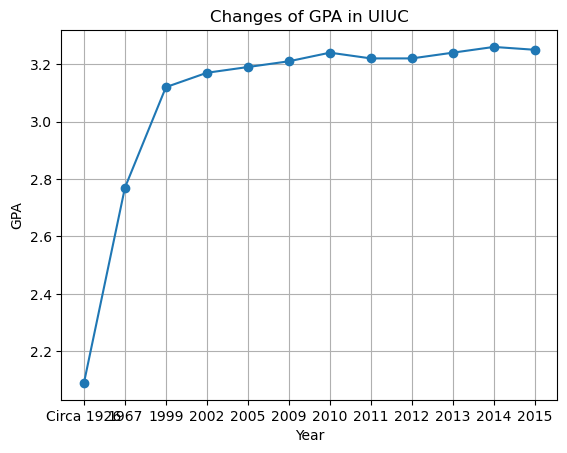

In [50]:
years = df_web['Year']
values = df_web['GPA']

plt.plot(years, values, marker='o', linestyle='-')

plt.xlabel('Year')
plt.ylabel('GPA')
plt.title('Changes of GPA in UIUC')

plt.grid(True)
plt.show()

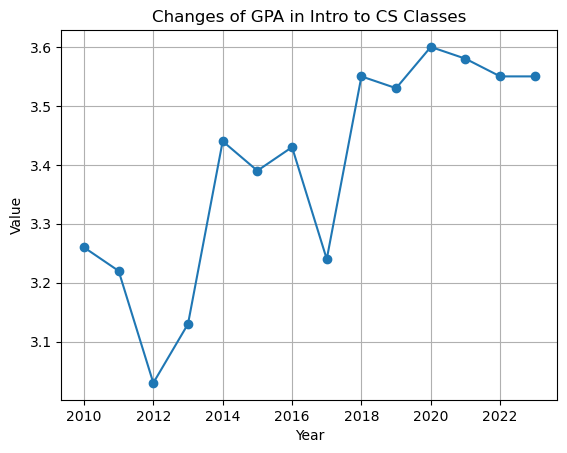

In [51]:
years = list(gpa_10_23.keys())
values = list(gpa_10_23.values())

plt.plot(years, values, marker='o', linestyle='-')

plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Changes of GPA in Intro to CS Classes')

plt.grid(True)
plt.show()

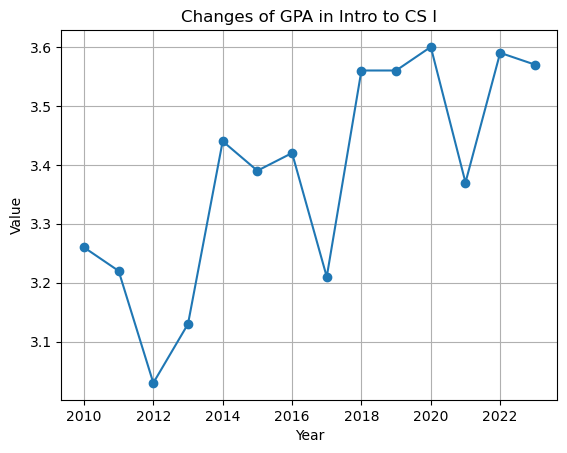

In [52]:
years = list(gpa_124_total.keys())
values = list(gpa_124_total.values())

plt.plot(years, values, marker='o', linestyle='-')

plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Changes of GPA in Intro to CS I')

plt.grid(True)
plt.show()

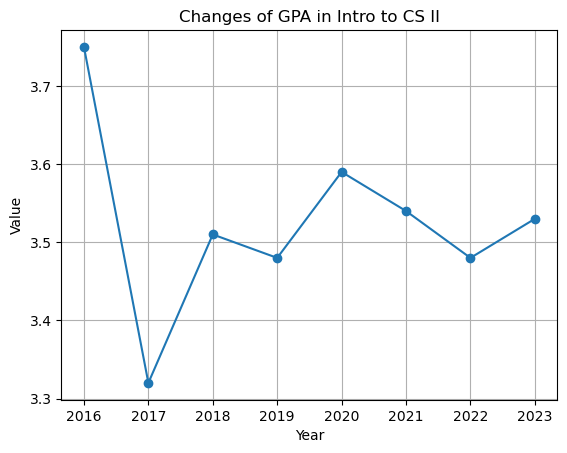

In [53]:
years = list(gpa_128_total.keys())
values = list(gpa_128_total.values())

plt.plot(years, values, marker='o', linestyle='-')

plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Changes of GPA in Intro to CS II')

plt.grid(True)
plt.show()

In [62]:
html2 = requests.get('https://cs125-old.cs.illinois.edu/info/2017/fall/syllabus/#_grade_components').text
soup = BeautifulSoup(html2, 'html.parser')
tables = soup.find_all('table')
desired_table = None
for table in tables:
    headers = table.find_all('th')
    for header in headers:
        if 'Component' in header.text:
            desired_table = table
            break
    if desired_table:
        break

data = []
for row in desired_table.find_all('tr'):
    cols = row.find_all(['td', 'th'])
    cols = [ele.text.strip() for ele in cols]
    data.append([ele for ele in cols if ele])

df_web2 = pd.DataFrame(data, columns=['Component', 'Percentage'])
df_web2 = df_web2.drop(0)
df_web2

,Component,Percentage
1,Weekly Quizzes,45%
2,Final Exam,25%
3,Machine Problems (MPs),15%
4,Turing’s Craft Exercises,5%
5,Lab Participation Points,5%
6,Lecture Participation Points,5%


In [73]:
html3 = requests.get('https://cs125-old.cs.illinois.edu/info/2018/spring/syllabus/#_grade_components').text
soup = BeautifulSoup(html3, 'html.parser')
tables = soup.find_all('table')
desired_table = None
for table in tables:
    headers = table.find_all('th')
    for header in headers:
        if 'Component' in header.text:
            desired_table = table
            break
    if desired_table:
        break

data = []
for row in desired_table.find_all('tr'):
    cols = row.find_all(['td', 'th'])
    cols = [ele.text.strip() for ele in cols]
    data.append([ele for ele in cols if ele])

df_web3 = pd.DataFrame(data, columns=['Component', 'Percentage'])
df_web3 = df_web3.drop(0)
df_web3

,Component,Percentage
1,Machine Problems (MPs),45%
2,Final Exam,20%
3,Weekly Quizzes,20%
4,Turing’s Craft Exercises,5%
5,Lab Participation,5%
6,Lecture Participation,5%


In [75]:
html6 = requests.get('https://cs125-old.cs.illinois.edu/info/2018/spring/syllabus/#_grade_components').text
soup = BeautifulSoup(html6, 'html.parser')
tables = soup.find_all('table')
desired_table = None
for table in tables:
    headers = table.find_all('th')
    for header in headers:
        if '# Assessments (Estimated)' in header.text:
            desired_table = table
            break
    if desired_table:
        break

data = []
for row in desired_table.find_all('tr'):
    cols = row.find_all(['td', 'th'])
    cols = [ele.text.strip() for ele in cols]
    data.append([ele for ele in cols if ele])

df_web6 = pd.DataFrame(data, columns=['Component', 'Percentage', '# Assessments', '# Dropped'])
df_web6 = df_web6.drop(0)
df_web6

,Component,Percentage,# Assessments,# Dropped
1,Machine Problems (MPs),45%,8,1
2,Weekly Quizzes,20%,15,3
3,Turing’s Craft Exercises,5%,30,5
4,Lab Participation,5%,15,3
5,Lecture Participation,5%,45,10


In [72]:
html4 = requests.get('https://cs125-old.cs.illinois.edu/info/2018/fall/syllabus/#_grade_components').text
soup = BeautifulSoup(html4, 'html.parser')
tables = soup.find_all('table')
desired_table = None
for table in tables:
    headers = table.find_all('th')
    for header in headers:
        if 'Component' in header.text:
            desired_table = table
            break
    if desired_table:
        break

data = []
for row in desired_table.find_all('tr'):
    cols = row.find_all(['td', 'th'])
    cols = [ele.text.strip() for ele in cols]
    data.append([ele for ele in cols if ele])

df_web4 = pd.DataFrame(data, columns=['Component', 'Percentage'])
df_web4 = df_web4.drop(0)
df_web4

,Component,Percentage
1,Machine Problems (MPs),40%
2,Homework,10%
3,Weekly Quizzes,25%
4,Three Midterms,15% (5% each)
5,Lab Participation,5%
6,Lecture Participation,5%


In [76]:
html7 = requests.get('https://cs125-old.cs.illinois.edu/info/2018/fall/syllabus/#_grade_components').text
soup = BeautifulSoup(html7, 'html.parser')
tables = soup.find_all('table')
desired_table = None
for table in tables:
    headers = table.find_all('th')
    for header in headers:
        if '# Assessments (Estimated)' in header.text:
            desired_table = table
            break
    if desired_table:
        break

data = []
for row in desired_table.find_all('tr'):
    cols = row.find_all(['td', 'th'])
    cols = [ele.text.strip() for ele in cols]
    data.append([ele for ele in cols if ele])

df_web7 = pd.DataFrame(data, columns=['Component', 'Percentage', '# Assessments', '# Dropped'])
df_web7 = df_web7.drop(0)
df_web7

,Component,Percentage,# Assessments,# Dropped
1,Machine Problems (MPs),40%,7,1
2,Homework Problems,10%,64,14
3,Weekly Quizzes,25%,12,3
4,Midterms,15%,3,0
5,Lab Participation,5%,15,3
6,Lecture Participation,5%,40,8


In [67]:
html5 = requests.get('https://www.businessofapps.com/data/chegg-statistics/').text
soup = BeautifulSoup(html5, 'html.parser')
tables = soup.find_all('table')
desired_table = None
for table in tables:
    headers = table.find_all('th')
    for header in headers:
        if 'Subscribers (mm)' in header.text:
            desired_table = table
            break
    if desired_table:
        break

data = []
for row in desired_table.find_all('tr'):
    cols = row.find_all(['td', 'th'])
    cols = [ele.text.strip() for ele in cols]
    data.append([ele for ele in cols if ele])

df_web5 = pd.DataFrame(data, columns=['Year', 'Subscribers (mm)'])
df_web5 = df_web5.drop(0)
df_web5['Subscribers (mm)'] = pd.to_numeric(df_web5['Subscribers (mm)'], errors='coerce')
df_web5

,Year,Subscribers (mm)
1,2013,0.5
2,2014,0.7
3,2015,1.0
4,2016,1.5
5,2017,2.2
6,2018,3.1
7,2019,3.9
8,2020,6.6
9,2021,7.8
10,2022,8.2


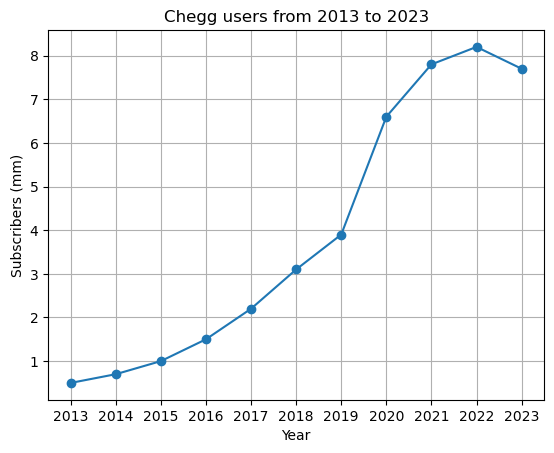

In [68]:
years = list(df_web5['Year'])
values = list(df_web5['Subscribers (mm)'])

plt.plot(years, values, marker='o', linestyle='-')

plt.xlabel('Year')
plt.ylabel('Subscribers (mm)')
plt.title('Chegg users from 2013 to 2023')

plt.grid(True)
plt.show()

<h2> Conclusion </h2>

In conclusion, this project was useful in preparing to become a data analyst in the future. I had difficulties with web scraping assignments in the lecture but I am now more familiar with the process. I was planning to discover the relationship between grade inflation and technological advancement. I chose the shift from in-person to online lectures because it is the most recent change in learning curriculums. However, grade inflation was associated with the course curriculum – technology being a part of it. During the COVID-19 era, we weren’t prepared for the pandemic which caused a quick transition in our learning methods. During the transition period, the instructors didn’t face similar challenges in the past. Thus, exceptions like extended outlines, CR/NC grades, and low-quality works were accepted. At the same time, students have more access to internet services. For example, Chegg, an education platform causing students’ academic dishonesty, had a significant increase in users from 3.9 million in 2019 to 7.8 million in 2021. Now, we are facing ChatGPT, which isn’t approved for some course curriculums at UIUC. 

I faced a challenge in writing the code I designed in my head. For example, in data curation, I repeated the same code from 2010 to 2023 when I wanted to compute using for loops. Also, as I researched my topic more thoroughly, it was frustrating that technology contributes only a small portion to grade inflation or GPA. However, I learned a lot about handling data and reflecting based on the patterns of the data.

For people who would utilize this data, the data used for the research is collected from the ‘Sources’ section of this notebook. The ‘Percentage’ column of the data for the past course syllabi isn’t numeric so it requires to be changed to numeric if it will be used for visualization or machine learning model.

<h3>Sources:</h3>
https://www.gradeinflation.com/Illinois.html<br>
https://www.webscrapingapi.com/find-out-how-to-scrape-html-table-with-python<br>
https://www.geeksforgeeks.org/add-column-names-to-dataframe-in-pandas/<br>
https://cs125-old.cs.illinois.edu/info/2017/fall/syllabus/#grading<br>
https://cs125-old.cs.illinois.edu/info/2018/spring/syllabus/#grading<br>
https://cs125-old.cs.illinois.edu/info/2018/fall/syllabus/#grading<br>
https://cs125-old.cs.illinois.edu/info/syllabus/#grading<br>
https://dailyillini.com/news-stories/2021/02/04/covid-19-grade-options-result-in-boosted-gpas-across-university/<br>
https://registrar.illinois.edu/courses-grades/explanation-of-grades/<br>
https://www.businessofapps.com/data/chegg-statistics/

<h3>IS 310 Course Website:</h3>
https://zoeleblanc.com/is310-computing-humanities-2024/